    Inés Fuai Guillén Peña      100495752

    Salvador Ayala Iglesias     100495832

In [14]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

En este **segundo notebook**, el **objetivo principal** es cargar los datos de la competencia y utilizar el modelo previamente entrenado para realizar predicciones sobre esos datos. 

Primero, cargamos el archivo de datos de la competencia, *attrition_competition_07.csv*, que contiene la información sobre la cual realizaremos la predicción. Luego, cargamos el modelo completo previamente entrenado y guardado en el **primer notebook**, que incluye tanto el preprocesamiento de los datos como el modelo de regresión logística con regularización L1 (Lasso). 

Con el modelo cargado, realizamos las predicciones utilizando el método *predict*, que procesa los datos de la competencia y genera las predicciones correspondientes.
 
Finalmente, las predicciones se guardan en un archivo CSV llamado **predicciones.csv**, el cual contiene la columna con las predicciones generadas.

In [15]:
# cargamos el archivo de datos de la competición
file_path = "attrition_competition_07.csv"
X_comp = pd.read_csv(file_path)

# cargamos el modelo completo guardado en el primer notebook
modelo_svm_cargado = joblib.load('modelo_final.pkl')

# realizamos las predicciones
predicciones = modelo_svm_cargado.predict(X_comp)

# guardamos las predicciones en un archivo CSV
df_pred = pd.DataFrame({'Predicciones': predicciones})
df_pred.to_csv('predicciones.csv', index=False)

A continuación, vamos a analizar las probabilidades generadas por el modelo para cada observación del conjunto de datos de la competencia. En lugar de limitarnos a obtener una predicción binaria, utilizamos el método *predict_proba* del pipeline entrenado para obtener la probabilidad estimada de que cada individuo pertenezca a la clase positiva.

Una vez obtenidas las probabilidades, visualizamos su distribución mediante un histograma utilizando la librería *seaborn*. Esta gráfica nos permite observar cómo se comporta el modelo: 
- Si las probabilidades están muy concentradas cerca de 0 o 1, indica que el modelo está tomando decisiones con alta confianza. 
- Si muchas probabilidades se agrupan en valores intermedios, podría reflejar incertidumbre en las predicciones.

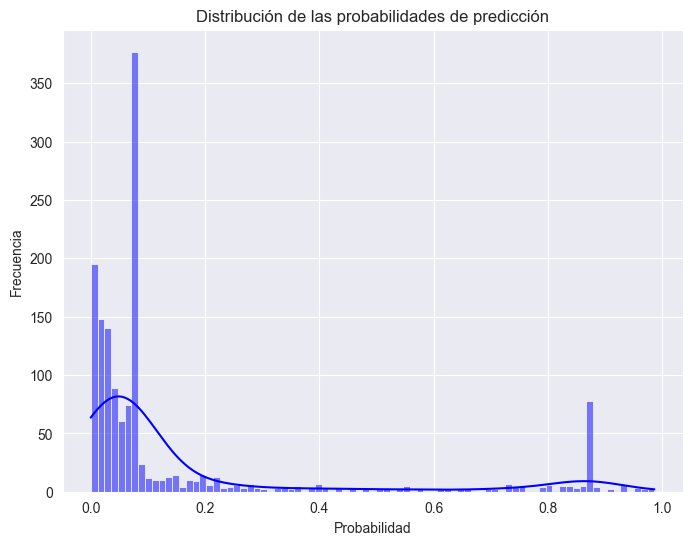

In [16]:
# obtenemos las probabilidades
probabilidades = modelo_svm_cargado.predict_proba(X_comp)

# mostramos un gráfico de las probabilidades predichas
plt.figure(figsize=(8, 6))
sns.histplot(probabilidades[:, 1], kde=True, color='blue')
plt.title('Distribución de las probabilidades de predicción')
plt.xlabel('Probabilidad')
plt.ylabel('Frecuencia')
plt.show()